<a href="https://colab.research.google.com/github/emichester/03MIAR_Algoritmos_de_Optimizacion/blob/main/AG1/Algoritmos_Emilio_Jes%C3%BAs_Hernandez_Salas_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1
# Emilio Jesús Hernández Salas

- Link repositorio de GitHub: [03MIAR_Algoritmos_de_Optimizacion](https://github.com/emichester/03MIAR_Algoritmos_de_Optimizacion)

## Problema: Torres de Hanoi

In [ ]:
def torres_hanoi(N, origen, destino, pivote):
    if N ==1:
        print(f"Mover bloque {N} desde {origen} a {destino}.")
        return

    torres_hanoi(N-1, origen, pivote, destino)
    print(f"Mover bloque {N} desde {origen} a {destino}.")
    torres_hanoi(N-1, pivote, destino, origen)

torres_hanoi(4, 1, 3, 2)

Mover bloque 1 desde 1 a 2.
Mover bloque 2 desde 1 a 3.
Mover bloque 1 desde 2 a 3.
Mover bloque 3 desde 1 a 2.
Mover bloque 1 desde 3 a 1.
Mover bloque 2 desde 3 a 2.
Mover bloque 1 desde 1 a 2.
Mover bloque 4 desde 1 a 3.
Mover bloque 1 desde 2 a 3.
Mover bloque 2 desde 2 a 1.
Mover bloque 1 desde 3 a 1.
Mover bloque 3 desde 2 a 3.
Mover bloque 1 desde 1 a 2.
Mover bloque 2 desde 1 a 3.
Mover bloque 1 desde 2 a 3.


## Problema: Cambio de monedas

In [ ]:
def cambio_monedas(CANTIDAD,SISTEMA):
    print("SISTEMA: ", SISTEMA)
    SOLUCION = [0]*len(SISTEMA)
    VALOR_ACUMULADO = 0

    for i,VALOR_MONETARIO in enumerate(SISTEMA):
        monedas = (CANTIDAD-VALOR_ACUMULADO)//VALOR_MONETARIO
        SOLUCION[i] = monedas
        VALOR_ACUMULADO += monedas*VALOR_MONETARIO
        if VALOR_ACUMULADO == CANTIDAD:
            break

    return SOLUCION

SISTEMA = [25,10,5,1]
cambio_monedas(30, SISTEMA)

SISTEMA:  [25, 10, 5, 1]


[1, 0, 1, 0]

## Problema: Encontrar los dos puntos más cercanos

array([ 503,  937, 4254, 5554, 5845, 6528, 8271, 9336], dtype=int32)

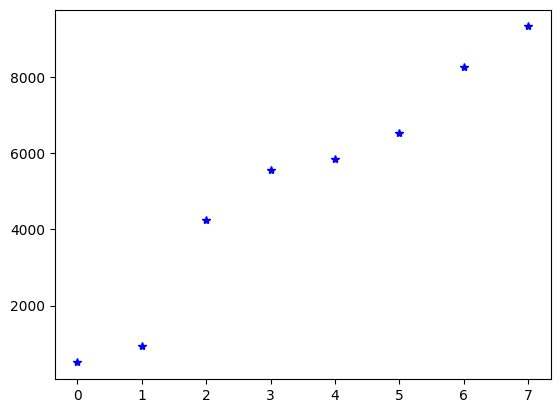

In [16]:
import numpy as np
import matplotlib.pyplot as plt

PUNTOS = np.sort((np.random.rand(8)*10000).astype(np.int32))
display(PUNTOS)
plt.plot(PUNTOS, 'b*');

### Fuerza bruta

In [17]:
def puntos_cercanos_fuerza_bruta(PUNTOS):
    distancia = 1e6
    SOLUCION = [0]*2
    for i in range(0,len(PUNTOS)-1):
        for j in range(1,len(PUNTOS)):
            if np.abs(PUNTOS[i]-PUNTOS[j]) < distancia and i!=j:
                distancia = np.abs(PUNTOS[i]-PUNTOS[j])
                SOLUCION = [PUNTOS[i],PUNTOS[j]]
                # print(SOLUCION)
    print("Puntos: ",SOLUCION, " y distancia: ", np.abs(SOLUCION[0]-SOLUCION[1]))

puntos_cercanos_fuerza_bruta(PUNTOS)

Puntos:  [5554, 5845]  y distancia:  291


## Divide y Vencerás

In [29]:
def puntos_cercanos_divide_y_venceras(PUNTOS):
    print(PUNTOS)
    distancia = 1e6
    dLmin = 1e6
    dRmin = 1e6
    dLRmin = 1e6
    SOLUCION = [0]*2
    if len(PUNTOS) == 0:
        return np.inf
    elif len(PUNTOS) == 1:
        return np.inf
    elif len(PUNTOS) == 2:
        return np.abs(PUNTOS[0]-PUNTOS[1])
    else:
        divL, divR = np.array_split(PUNTOS, 2)
        dL = puntos_cercanos_divide_y_venceras(divL)
        dR = puntos_cercanos_divide_y_venceras(divR)
        if dL < dLmin:
            dLmin = dL
        if dR < dRmin:
            dRmin = dR
        if dRmin > dLmin:
            return dLmin
        else:
            return dRmin

puntos_cercanos_divide_y_venceras(PUNTOS)

[ 503  937 4254 5554 5845 6528 8271 9336]
[ 503  937 4254 5554]
[503 937]
[4254 5554]
[5845 6528 8271 9336]
[5845 6528]
[8271 9336]


434

In [26]:
def puntos_cercanos_divide_y_venceras(PUNTOS):
    # print(PUNTOS)
    distancia = 1e6
    dLmin = 1e6
    dRmin = 1e6
    dLRmin = 1e6
    SOLUCION = [0]*2
    if len(PUNTOS) == 0:
        return np.inf
    elif len(PUNTOS) == 1:
        return PUNTOS[0]
    else:
        divL, divR = np.array_split(PUNTOS, 2)
        pL = puntos_cercanos_divide_y_venceras(divL)
        pR = puntos_cercanos_divide_y_venceras(divR)
        # print(pL, pR)
        if dLRmin > np.abs(pL-pR):
            dLRmin = np.abs(pL-pR)
        return dLRmin

puntos_cercanos_divide_y_venceras(PUNTOS)

484